## Iris Dataset

In [10]:
import pandas as pd

df = pd.read_csv(filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None,
                 sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [12]:
# split data table into data X and class labels y
X = df.ix[:,0:4].values
y = df.ix[:,4].values

## Data Visualization

<IPython.core.display.Javascript object>


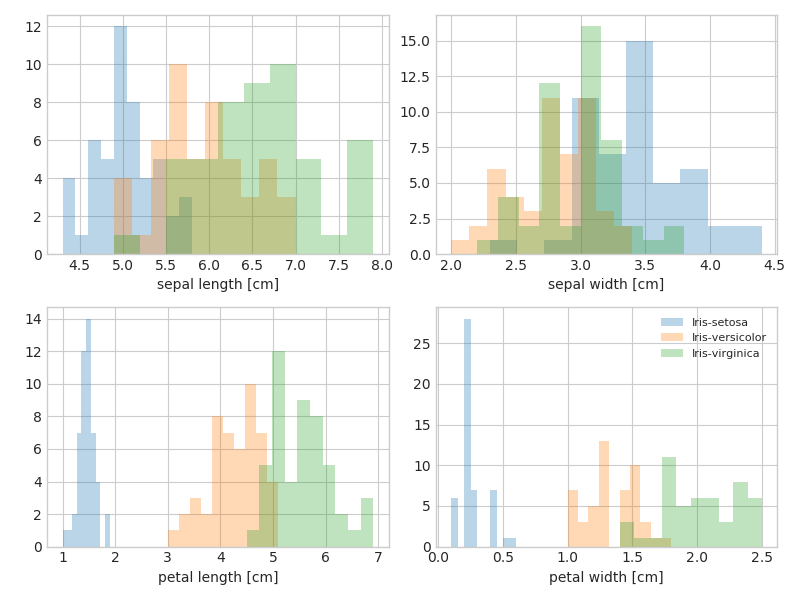

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib notebook

label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,
                    )
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()

## Standardizing the Data

In [15]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## Eigendecomposition

In [24]:
import numpy as np
# Compute the standardized feature columns mean vector
mean_vec = np.mean(X_std, axis=0)   # (n_features, 1)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0] - 1)

In [33]:
cov_mat = np.cov(X_std.T)
print('Covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [34]:
# Eigendecomposition on the covariance matrix
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[ 2.93035378  0.92740362  0.14834223  0.02074601]


In [35]:
# SVD
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

## Selecting Principal Components

### Sorting eigenpairs

In [41]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
2.93035377559
0.927403621517
0.148342226482
0.0207460139956


### Explained Variance

In [47]:
tot = np.sum(eig_vals)
var_exp = [(v / tot) * 100 for v in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

<IPython.core.display.Javascript object>


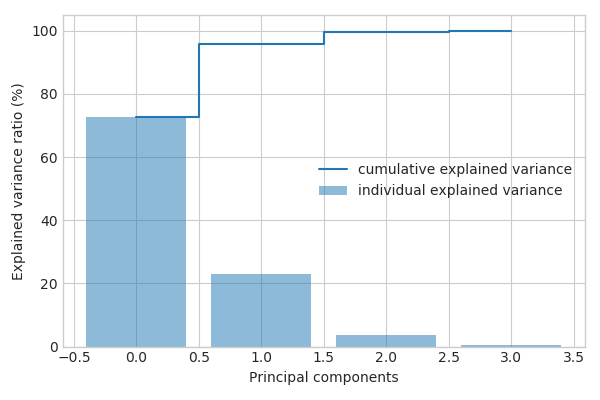

In [49]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio (%)')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

## Projection Matrix

In [50]:
# Keep the first two eigenvectors and stack them to form the projection matrix
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


## Projection Onto the New Feature Space

In [60]:
Y = X_std.dot(matrix_w)

<IPython.core.display.Javascript object>


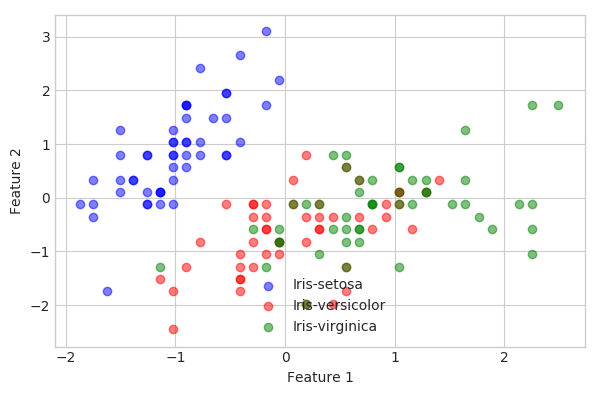

In [61]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(X_std[y==lab, 0],
                    X_std[y==lab, 1],
                    label=lab,
                    c=col,
                    alpha=0.5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend(loc='lower center')
    plt.tight_layout()

<IPython.core.display.Javascript object>


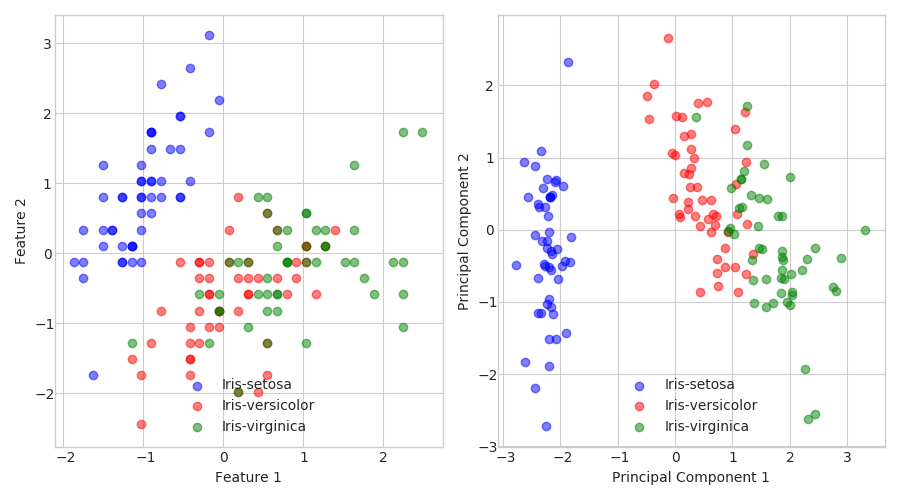

In [77]:
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), ('blue', 'red', 'green')):
        ax[0].scatter(X_std[y==lab, 0], X_std[y==lab, 1], label=lab, c=col, alpha=0.5)
        ax[1].scatter(Y[y==lab, 0], Y[y==lab, 1], label=lab, c=col, alpha=0.5)

    ax[0].set_xlabel('Feature 1')
    ax[0].set_ylabel('Feature 2')
    ax[0].legend(loc='lower center')
    
    ax[1].set_xlabel('Principal Component 1')
    ax[1].set_ylabel('Principal Component 2')
    ax[1].legend(loc='lower center')
    
    plt.tight_layout()

## PCA With Sklearn

In [78]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)